___
# Brushed and Brushless Motor Behavior and Gearbox Design
___

**Model and Parameters:**
1. Brushed Motor Specs: Magmotor S28-150.
2. LiPo: 4.2 volts per cell when fully charged. Usually 5s (5 cells in series).    
___

The following equations must be altered to consider the inductance.

## 1. Brushed

In [32]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt

In [33]:
Vin = 24

Voltage applied to the terminals, volts.

In [34]:
Kt = 0.03757

Torque generated per current drawn (N⋅m/A)

In [35]:
R = 0.148

Electric resistance between the motor contacts, measured in Ω.

In [46]:
Inoload = 3.4

Current drawn by the motor to spin without any load on its shaft. In an ideal motor (which doesn’t exist in practice), there would 
be no mechanical friction losses, resulting in Ino_load = 0, and the electrical resistance would be zero.

In [37]:
Kv = 1/Kt

Speed constant. Motor speed per applied voltage (rad/s)/V.

In [47]:
Iin = [i/10 for i in range(34,1620)]

Current that the motor is drawing.

## Applied torque:

In [48]:
T = []
for i in Iin:
    T.append(Kt * (i - Inoload))

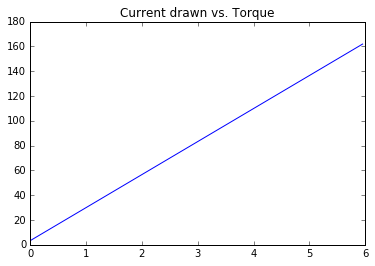

In [49]:
plt.plot(T, Iin)
plt.title('Current drawn vs. Torque')

## Rotor angular speed:

In [50]:
w = []
for i in Iin:
    w.append(Kv * (Vin - R * i))

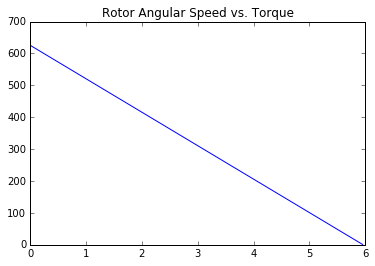

In [51]:
plt.plot(T, w)
plt.title('Rotor Angular Speed vs. Torque')

In [52]:
#Pin = Vin * Iin
#consumed electric power
Pout = []
for i in Iin:
    Pout.append((Kt * (i - Inoload))*(Kv * (Vin - R * i)))
#generated mechanical power

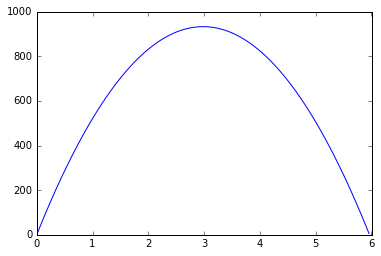

In [53]:
plt.plot(T, Pout)

We want the largest possible mechanical power output while spending the minimum amount of electrical power, which can be quantified by the
efficiency.

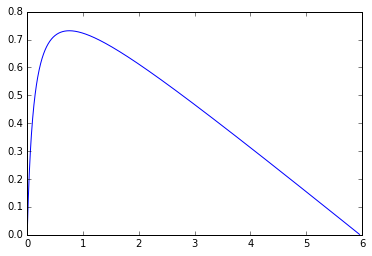

In [58]:
#eta = Pout/Pin
eta = []
for i in Iin:
    eta.append(((i - Inoload)*(Vin - R*i))/(Vin*i))
plt.plot(T, eta)

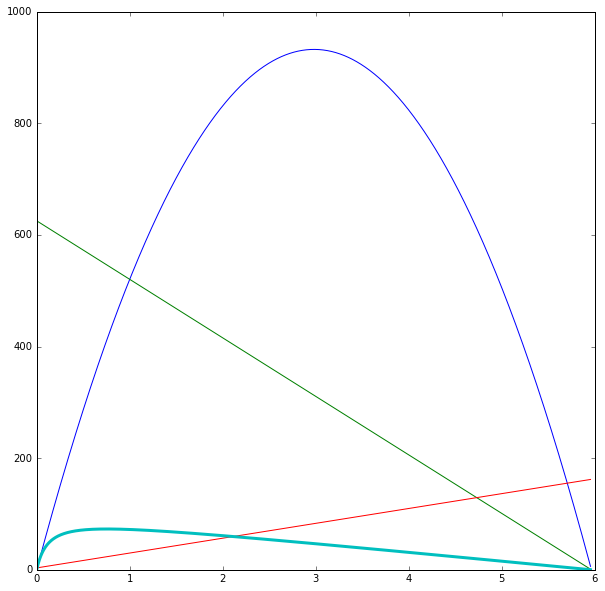

In [65]:
plt.figure(figsize=(10,10))  
plt.plot(T, Pout)
plt.plot(T, w)
plt.plot(T, Iin)
eta2 = [100*i for i in eta]
plt.plot(T, eta2,lw=3)